# APPENDIX B

# Comparing happiness between Finland and Malaysia

## Packages

In [1]:
### INSTALLING PACKAGES ###

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import altair as alt
from sklearn.linear_model import LinearRegression
from sklearn import metrics


## Importing Data

In [2]:
### IMPORTING DATA ###

df = pd.read_csv("WHR_data.csv")

df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.051,0.831,0.658,0.235
2359,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.003,0.789,0.661,0.346
2360,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.079,0.757,0.610,0.242
2361,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,-0.073,0.753,0.641,0.191


## Understanding the Dataset

In [3]:
### VARIABLE INFORMATION ###

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [4]:
len(np.unique(df['Country name']))

# df.loc[df['Country name'].str.contains('Korea', case = False, na = False)]

165

In [5]:
### DESCRIPTIVE STATISTICS ###

df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2335.000000,2350.000000,2300.000000,2327.000000,2282.000000,2238.000000,2339.000000,2347.000000
mean,2014.763860,5.483566,9.399671,0.809369,63.401828,0.750282,0.000098,0.743971,0.651882,0.273151
std,5.059436,1.125522,1.152069,0.121212,6.842644,0.139357,0.161388,0.184865,0.106240,0.087131
min,2005.000000,1.281000,5.527000,0.228000,6.720000,0.228000,-0.340000,0.035000,0.179000,0.083000
25%,2011.000000,4.647000,8.506500,0.744000,59.195000,0.661000,-0.112000,0.687000,0.572000,0.209000
50%,2015.000000,5.449000,9.503000,0.834500,65.100000,0.771000,-0.022000,0.798500,0.663000,0.262000
75%,2019.000000,6.323500,10.392500,0.904000,68.552500,0.862000,0.093750,0.867750,0.737000,0.326000
max,2023.000000,8.019000,11.676000,0.987000,74.600000,0.985000,0.700000,0.983000,0.884000,0.705000


## Correlation Matrix

In [6]:
### DATAFRAME WITH ONLY NUMERIC COLUMNS (NO COUNTRY/YEAR) ###

df2 = df.iloc[: , 2:]
df2.columns

Index(['Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

Text(0.5, 1.0, 'ALL COUNTRIES')

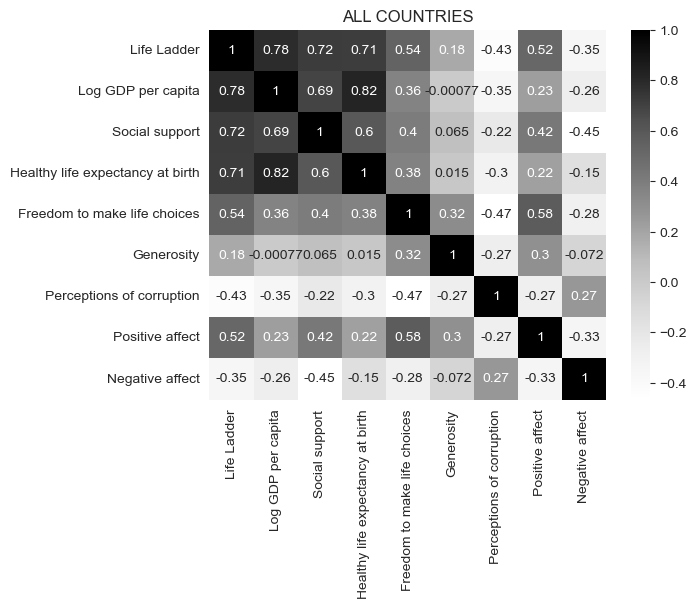

In [7]:
### CORRELATION MATRIX ###
df3_matrix = df2.corr()

sns.heatmap(df3_matrix, cmap = "Greys", annot = True)
plt.title("ALL COUNTRIES")

### Time Series of Happiness Scores Across All Countries

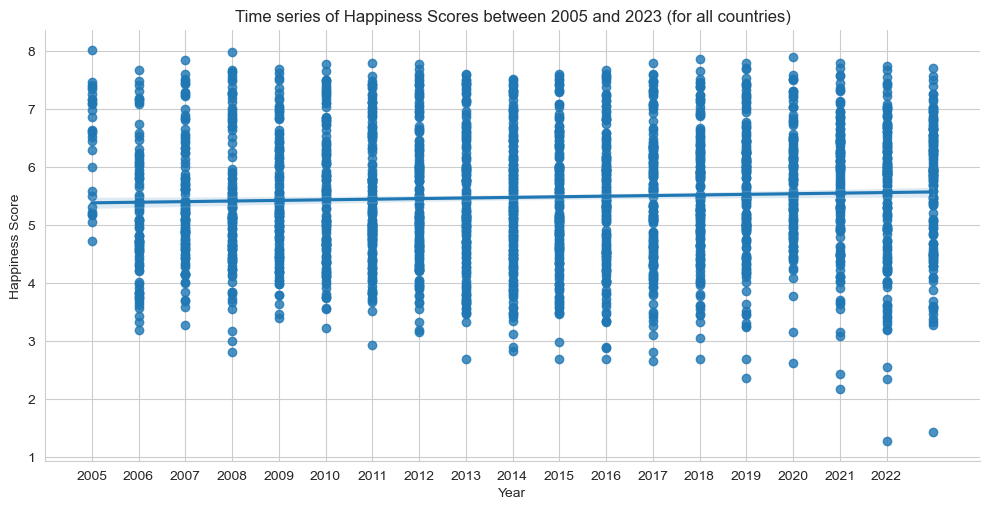

In [8]:
### COMPARING HAPPINESS SCORES THROUGHOUT THE YEARS ###

# Creating the plot
sns.lmplot(df, x = "year", y = "Life Ladder", aspect = 2)

# Customising label names
plt.title("Time series of Happiness Scores between 2005 and 2023 (for all countries)")
plt.xlabel("Year")
plt.ylabel("Happiness Score")

# Customising axes
plt.xlim(2004, 2024)
plt.xticks(range(2005, 2023, 1))

# Show plot
plt.show()

## Happiest & Unhappiest Countries of 2023

In [9]:
### HAPPIEST AND UNHAPPIEST COUNTRIES OF 2023 ###

df23 = df[df['year'] == 2023 ]

happiest = df23[df23['Life Ladder'] == df23['Life Ladder'].max()]
unhappiest = df23[df23['Life Ladder'] == df23['Life Ladder'].min()]

pd.concat([happiest, unhappiest], ignore_index = True, sort = False)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Finland,2023,7.699,10.808,0.947,71.3,0.943,-0.001,0.185,0.717,0.173
1,Afghanistan,2023,1.446,NaN,0.368,55.2,0.228,NaN,0.738,0.261,0.460


## Finland vs Malaysia

In [10]:
### DATAFRAME ONLY WITH MALAYSIA & FINALND ###

df_fm = df.loc[df['Country name'].isin(['Malaysia', 'Finland'])]

df_fm

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
665,Finland,2006,7.672,10.745,0.965,68.720,0.969,-0.011,0.132,0.683,0.172
666,Finland,2008,7.671,10.796,0.951,69.160,0.934,0.022,0.217,0.691,0.144
667,Finland,2010,7.393,10.734,0.935,69.600,0.916,0.085,0.413,0.758,0.202
668,Finland,2011,7.354,10.754,0.938,69.820,0.936,0.095,0.320,0.709,0.205
669,Finland,2012,7.420,10.735,0.928,70.040,0.921,-0.007,0.361,0.742,0.202
670,Finland,2013,7.445,10.722,0.941,70.260,0.919,0.034,0.306,0.752,0.195
671,Finland,2014,7.385,10.714,0.952,70.480,0.933,-0.007,0.265,0.766,0.199
672,Finland,2015,7.448,10.716,0.948,70.700,0.930,0.105,0.223,0.736,0.191
673,Finland,2016,7.660,10.741,0.954,70.775,0.948,-0.033,0.250,0.769,0.182
674,Finland,2017,7.788,10.770,0.964,70.850,0.962,-0.008,0.192,0.756,0.176


In [11]:
np.unique(df_fm['Country name'].values)

array(['Finland', 'Malaysia'], dtype=object)

In [19]:
### SUBSETING DATA ###

dfm = df_fm.loc[df['Country name'].isin(['Malaysia'])]
dff = df_fm.loc[df['Country name'].isin(['Finland'])]

print (dfm.shape, dff.shape)

# print(np.unique(dfm['Country name']), np.unique(dfs['Country name']), sep="\n")

(16, 11) (16, 11)


### Malaysia Correlation Matrix

Text(0.5, 1.0, 'MALAYSIA')

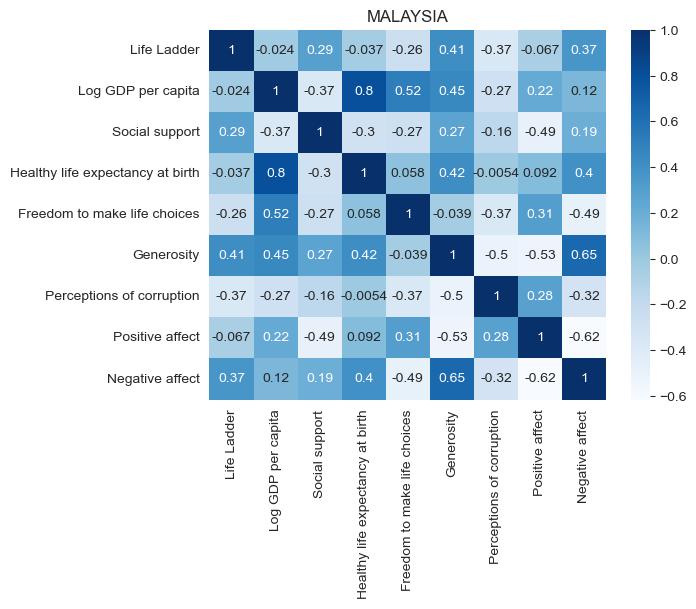

In [20]:
### MALAYSIA CORRELATON MATRIX ###
dfm2 = dfm.iloc[ : , 2:]
dfm_matrix = dfm2.corr()

sns.heatmap(dfm_matrix, cmap = "Blues", annot = True)
plt.title("MALAYSIA")

### Finland Correlation Matrix


Text(0.5, 1.0, 'FINLAND')

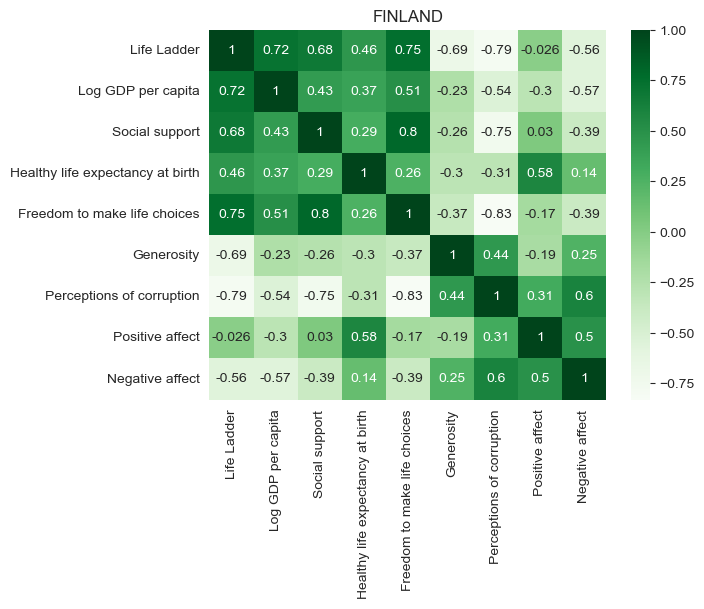

In [14]:
### FINLAND CORRELATON MATRIX ###
dff2 = dff.iloc[ : , 2:]
dff_matrix = dff2.corr()

sns.heatmap(dff_matrix, cmap = "Greens", annot = True)
plt.title("FINLAND")

### Interactive Time Series Chart Comparing Happiness Scores


In [15]:
### CHART COMPARING HAPPINESS SCORES BETWEEN MALAYSIA AND FINLAND ###

alt.Chart(df_fm, title = "Time Series of Happiness Scores between Malaysia and Finland"
          ).mark_circle().properties(width = 500, height = 500).encode(
    x = alt.X('year', title = "Year",
              scale = alt.Scale(domain = [2004, 2024]),     # Customise x-axis limits
              axis = alt.Axis(format = 'd',                 # Format variable as plain integers (i.e., remove comma)
                              tickCount = 21                # Set one tick per year
                              )
              ),
    y = alt.Y('Life Ladder', title = "Happiness Score (or Life Ladder)",
              scale = alt.Scale(domain = [5, 8])            # Customise y-axis limits
              ),
    color = alt.Color('Country name', title = 'Country'),
    tooltip = ['Country name', 'year', 'Life Ladder']       # Interactivity
)

alt.Chart(...)

### Time Series Comparing Happiness Scores

(5.0, 9.0)

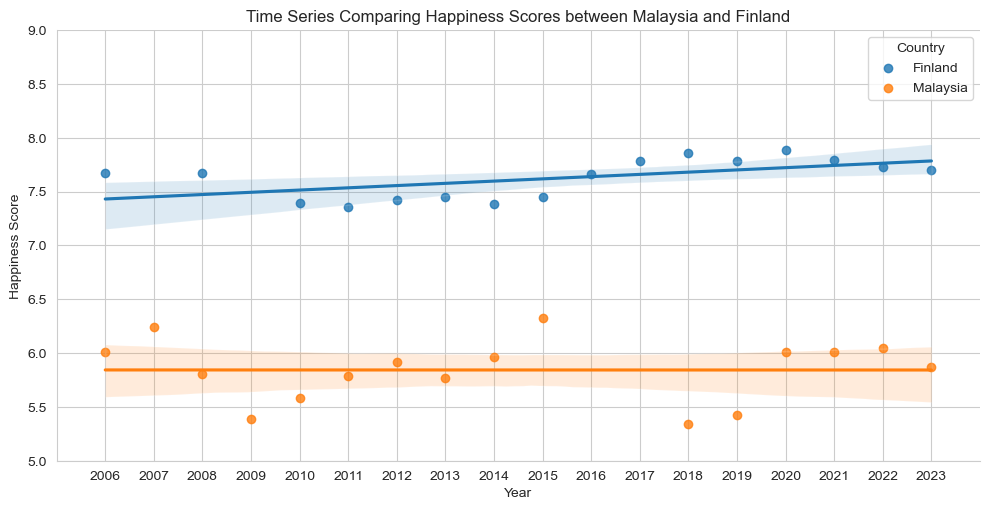

In [16]:
### TIME SERIES COMPARING HAPPINESS SCORES BETWEEN MALAYSIA AND FINLAND ###

sns.lmplot(df_fm, x = "year", y = "Life Ladder", hue = "Country name", legend = False, aspect = 2)

# Customising axes labels
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.legend(title = "Country")
plt.title("Time Series Comparing Happiness Scores between Malaysia and Finland")

# Customising axes
plt.xlim(2005, 2024)
plt.xticks(range(2006, 2024, 1))
plt.ylim(5, 9)

### Mean & Variance of Happiness Scores

In [17]:
### MEAN & VARIANCE OF HAPPINESS SCORES ###

## MALAYSIA ##
malaysia_mean = dfm['Life Ladder'].mean()
malaysia_var = dfm['Life Ladder'].var()

print("### Malaysia ###", f"Mean: {malaysia_mean}", f"Variance: {malaysia_var}", sep="\n")


## FINLAND ##
fin_mean = dff['Life Ladder'].mean()
fin_var = dff['Life Ladder'].var()

print("### Finland ###", f"Mean: {fin_mean}", f"Variance: {fin_var}", sep="\n")

### Malaysia ###
Mean: nan
Variance: nan
### Finland ###
Mean: 7.624062500000001
Variance: 0.03437246249999999


## Linear Regression of Happiness Scores Across the Years (Malaysia)

In [ ]:
### SIMPLE LINEAR REGRESSION (OLS) FOR MALAYSIA ###

# Predictor and outcome variables
my_x = dfm[['year']]
my_y = dfm[['Life Ladder']]


## CREATE & TRAIN MODEL ##
my_model = LinearRegression(fit_intercept = True)
my_model.fit(my_x, my_y)

my_y_hat = my_model.predict(my_x)


## CREATE PLOT ##
plt.plot(my_x, my_y,'o', alpha = 0.5)
plt.plot(my_x, my_y_hat, 'r', alpha = 0.5)
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.xticks(range(2005, 2024, 1), rotation = 45)
plt.title("Time series of Happiness Scores in Malaysia")


## STATISTICS ##
my_coeff = round(my_model.coef_[0][0], 9)
my_intercept = round(my_model.intercept_[0], 5)
print (f"Coefficients: {my_coeff}", f"Intercept: {my_intercept}", sep = "\n")


## EVALUATE MODEL ##
mse = round(metrics.mean_squared_error(my_y, my_y_hat), 5)
r2 = round(metrics.r2_score(my_y, my_y_hat), 11)
my_var = round(my_y.var(), 5)

print (f"MSE: {mse}", f"R-squared: {r2}" , f"Variance: {my_var}", sep = "\n")


## PREDICTION FOR 2024 ##
my_X = pd.DataFrame({'year': [2024]})
my_X_year = my_X.year.values[0]

my_pred = my_model.predict(my_X)
my_pred_val = my_pred[0][0]

print (f"Predicted happiness score for Malaysia in {my_X_year}: {my_pred_val}")

### Predicting Happiness Score for 2024

In [ ]:
## PLOT WITH PREDICTED HAPPINESS SCORE FOR MALAYSIA ##
plt.plot(my_x, my_y,'o', alpha = 0.5)
plt.plot(my_x, my_y_hat, 'r', alpha = 0.5)
plt.plot(my_X_year, my_pred_val,'x', color = "purple")
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title("Time series of Happiness Scores in Malaysia with Predicted Happiness Score in 2024")
plt.xticks(range(2005, 2025, 1), rotation = 45)

## Linear Regression of Happiness Scores Across the Years (Finland)

In [ ]:
### SIMPLE LINEAR REGRESSION (OLS) FOR FINLAND ###

## PREDICTOR AND OUTPUT VARIABLES ##
fn_x = dff[['year']]
fn_y = dff[['Life Ladder']]


##  CREATE AND TRAIN MODEL ##
fn_model = LinearRegression(fit_intercept = True)
fn_model.fit(fn_x, fn_y)

fn_y_hat = fn_model.predict(fn_x)


## CREATE PLOT ##
plt.plot(fn_x, fn_y,'o', alpha = 0.5)
plt.plot(fn_x, fn_y_hat, 'r', alpha = 0.5)
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title("Time series of Happiness Scores in Finland")
plt.xticks(range(2005, 2024, 1), rotation = 45)


## STATISTICS ##
fn_coeff = fn_model.coef_[0][0]
fn_intercept = fn_model.intercept_[0]

print("Coefficients:", fn_coeff)
print ("Intercept:", fn_intercept)

## EVALUATE MODEL ##
print ("MSE:", metrics.mean_squared_error(fn_y, fn_y_hat))
print ("R-squared:", metrics.r2_score(fn_y, fn_y_hat))
print ("Variance:", fn_y.var())


## PREDICTION FOR 2024 ##
fn_X = pd.DataFrame({'year': [2024]})
fn_X_year = fn_X.year.values[0]

fn_pred = fn_model.predict(fn_X)
fn_pred_val = fn_pred[0][0]

print (f"Predicted happiness score for Finland in {fn_X_year}:", fn_pred_val)

### Predicting Happiness Score for 2024

In [ ]:
## PLOT WITH PREDICTED HAPPINESS SCORE FOR FINLAND ##
plt.plot(fn_x, fn_y,'o', alpha = 0.5)
plt.plot(fn_x, fn_y_hat, 'r', alpha = 0.5)
plt.plot(fn_X_year, fn_pred_val,'x', color = "purple")
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title("Time series of Happiness Scores in Malaysia with Predicted Happiness Score in 2024")
plt.xticks(range(2005, 2025, 1), rotation = 45)


## LM Functions

### Both

In [ ]:
### GENERAL PREDICTOR FUNCTION ###

def lm(xvar):

    ### PREDICTOR & OUTPUT VARIABLES ###
    # Finland
    fn_x = dff[[xvar]]
    fn_y = dff[['Life Ladder']]

    # Malaysia
    my_x = dfm[[xvar]]
    my_y = dfm[['Life Ladder']]


    ###  CREATE AND TRAIN MODEL ###
    # Finland
    fn_model = LinearRegression(fit_intercept = True)
    fn_model.fit(fn_x, fn_y)

    fn_y_hat = fn_model.predict(fn_x)

    # Malaysia
    my_model = LinearRegression(fit_intercept = True)
    my_model.fit(my_x, my_y)

    my_y_hat = my_model.predict(my_x)


    ### CREATE PLOT ###
    # Finland
    plt.plot(fn_x, fn_y,'o', alpha = 0.5, label = 'Finland')
    plt.plot(fn_x, fn_y_hat, 'r', alpha = 0.5)

    # Malaysia
    plt.plot(my_x, my_y,'o', alpha = 0.5, label = 'Malaysia')
    plt.plot(my_x, my_y_hat, 'r', alpha = 0.5)

    # Customisation
    plt.xlabel(f'{xvar}')
    plt.ylabel('Happiness Score')
    plt.title(f"Relationship between {xvar} and Happiness Score")
    plt.legend(title = "Country")



    ### STATISTICS ###
    print ('### FINLAND ###')
    fn_coeff = fn_model.coef_[0][0]
    fn_intercept = fn_model.intercept_[0]

    print(f"Coefficients: {fn_coeff}", f"Intercept: {fn_intercept}", sep = "\n")

    ## EVALUATE MODEL ##
    mse = round(metrics.mean_squared_error(fn_y, fn_y_hat), 5)
    r2 = round(metrics.r2_score(fn_y, fn_y_hat), 11)
    my_var = round(fn_y.var(), 5)
    my_var_val = my_var.values[0]

    print (f"MSE: {mse}", f"R-squared: {r2}" , f"Variance: {my_var_val}", sep = "\n")


    ### STATISTICS ###
    print ('### MALAYSIA ###')
    my_coeff = round(my_model.coef_[0][0], 9)
    my_intercept = round(my_model.intercept_[0], 5)
    print (f"Coefficients: {my_coeff}", f"Intercept: {my_intercept}", sep = "\n")

    ## EVALUATE MODEL ##
    mse = round(metrics.mean_squared_error(my_y, my_y_hat), 5)
    r2 = round(metrics.r2_score(my_y, my_y_hat), 11)
    my_var = round(my_y.var(), 5)
    my_var_val = my_var.values[0]

    print (f"MSE: {mse}", f"R-squared: {r2}" , f"Variance: {my_var_val}", sep = "\n")

### Finland

In [ ]:
### PREDICTOR FUNCTION FOR FINLAND ###

def fin_lm(xvar, x1, x2, xstep):

    # Predictor and Output Variables
    fn_x = dff[[xvar]]
    fn_y = dff[['Life Ladder']]


    ##  CREATE AND TRAIN MODEL ##
    fn_model = LinearRegression(fit_intercept = True)
    fn_model.fit(fn_x, fn_y)

    fn_y_hat = fn_model.predict(fn_x)


    ## CREATE PLOT ##
    plt.plot(fn_x, fn_y,'o', alpha = 0.5)
    plt.plot(fn_x, fn_y_hat, 'r', alpha = 0.5)
    plt.xlabel(f'{xvar}')
    plt.ylabel('Happiness Score')
    plt.xticks(np.arange(x1, x2, xstep), rotation = 45)
    plt.title(f"Relationship between {xvar} and Happiness Score (Finland)")

    print ('### FINLAND ###')

    ## STATISTICS ##
    fn_coeff = fn_model.coef_[0][0]
    fn_intercept = fn_model.intercept_[0]

    print(f"Coefficients: {fn_coeff}", f"Intercept: {fn_intercept}", sep = "\n")

    ## EVALUATE MODEL ##
    mse = round(metrics.mean_squared_error(fn_y, fn_y_hat), 5)
    r2 = round(metrics.r2_score(fn_y, fn_y_hat), 11)
    my_var = round(fn_y.var(), 5)
    my_var_val = my_var.values[0]

    print (f"MSE: {mse}", f"R-squared: {r2}" , f"Variance: {my_var_val}", sep = "\n")

### Malaysia

In [ ]:
### PREDICTOR FUNCTION FOR MALAYSIA ###

def my_lm(xvar, x1, x2, xstep):

    # Predictor and outcome variables
    my_x = dfm[[xvar]]
    my_y = dfm[['Life Ladder']]


    ## CREATE & TRAIN MODEL ##
    my_model = LinearRegression(fit_intercept = True)
    my_model.fit(my_x, my_y)

    my_y_hat = my_model.predict(my_x)


    ## CREATE PLOT ##
    plt.plot(my_x, my_y,'o', alpha = 0.5)
    plt.plot(my_x, my_y_hat, 'r', alpha = 0.5)
    plt.xlabel(f'{xvar}')
    plt.ylabel('Happiness Score')
    plt.xticks(np.arange(x1, x2, xstep), rotation = 45)
    plt.title(f"Relationship between {xvar} and Happiness Score (Malaysia)")

    print ('### MALAYSIA ###')

    ## STATISTICS ##
    my_coeff = round(my_model.coef_[0][0], 9)
    my_intercept = round(my_model.intercept_[0], 5)
    print (f"Coefficients: {my_coeff}", f"Intercept: {my_intercept}", sep = "\n")


    ## EVALUATE MODEL ##
    mse = round(metrics.mean_squared_error(my_y, my_y_hat), 5)
    r2 = round(metrics.r2_score(my_y, my_y_hat), 11)
    my_var = round(my_y.var(), 5)
    my_var_val = my_var.values[0]

    print (f"MSE: {mse}", f"R-squared: {r2}" , f"Variance: {my_var_val}", sep = "\n")

## Log GDP per capita

### Both

In [ ]:
my_lm('Log GDP per capita')

### Malaysia

In [ ]:
my_lm('Log GDP per capita', 9.8, 10.42, 0.1)

### Finland

In [ ]:
fin_lm('Log GDP per capita', 10.7, 10.83, 0.01)

## Freedom to make life choices

### Both

In [ ]:
lm('Freedom to make life choices')

### Finland

In [ ]:
fin_lm('Freedom to make life choices', 0.90, 1.01, 0.01)

### Malaysia

In [ ]:
my_lm('Freedom to make life choices', 0.65, 1.05, 0.05)

## Generosity

### Both

In [ ]:
lm('Generosity')


### Finland

In [ ]:
fin_lm('Generosity', -0.15, 0.17, 0.05)

### Malaysia

In [ ]:
my_lm('Generosity', -0.05, 0.33, 0.05)

## Multiple Regression

In [ ]:
df['Freedom to make life choices'].min()     # Between 0.228 and 0.985
df['Generosity'].max()                       # Between -0.34 and 0.7

**_CHECK IF NEED TO NORMALISE OR STANDARDISE_**

In [ ]:
my_mrmodel = LinearRegression(fit_intercept = True)
myx_mr = dfm[['Freedom to make life choices','Generosity']]
myy_mr = dfm[['Life Ladder']]

my_mrmodel.fit(myx_mr, myy_mr)

print("Coefficients:", my_mrmodel.coef_)
print ("Intercept:", my_mrmodel.intercept_)

my_mrpred = my_mrmodel.predict(myx_mr)

print ("MSE:", metrics.mean_squared_error(myy_mr, my_mrpred))
print ("R^2:", metrics.r2_score(myy_mr, my_mrpred))
print ("var:", myy_mr.var())